In [13]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter

In [14]:
#Read graph from file
G = nx.read_edgelist('p2p-Gnutella08.txt', create_using=nx.DiGraph(), nodetype=int)

In [15]:
print(f"Graph {'directed' if nx.is_directed(G) else 'undirected'}")
N = G.number_of_nodes()
print(f"Numbers of nodes = {N}")
L = G.number_of_edges()
print(f"Numbers of edges = {L}")

## density
p = nx.density(G)
print(f"Density  = {p}")

## Average Degree 
avg_degree = L/N if nx.is_directed(G) else 2*L/N
print(f"Average Degree = {avg_degree}")


Graph directed
Numbers of nodes = 6301
Numbers of edges = 20777
Density  = 0.0005233989061952878
Average Degree = 3.2974131090303125


In [16]:
## average shortest path
pathlengths = []

for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    for p in spl:
        pathlengths.append(spl[p])

print(f"average shortest path length: {sum(pathlengths) / len(pathlengths)}")


average shortest path length: 6.629006992371095


In [19]:
## giant component size
giant = max(nx.strongly_connected_components(G), key=len)
if nx.is_directed(G): print(f"biggest strong component size = {len(giant)}")
else: print(f"giant component size = {len(giant)}")
#graph trasmformed to undirected to calculate giant component size
gcs = max((G.subgraph(c) for c in nx.connected_components(G.to_undirected())), key=len)
print(f"giant component size = {len(gcs)}")


biggest strong component size = 2068
giant component size = 6299


In [26]:
def plot_histogram(G, title, ylabel, xlabel, x, y):
    fig, ax = plt.subplots()
    plt.gcf().set_size_inches(16, 8)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.bar(x, y, align='center', width=0.80)
    plt.show()

In [27]:
def plot_distribution(G,title,ylabel,xlabel,x,y):
    plt.figure(figsize=(16,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.plot(x,y)

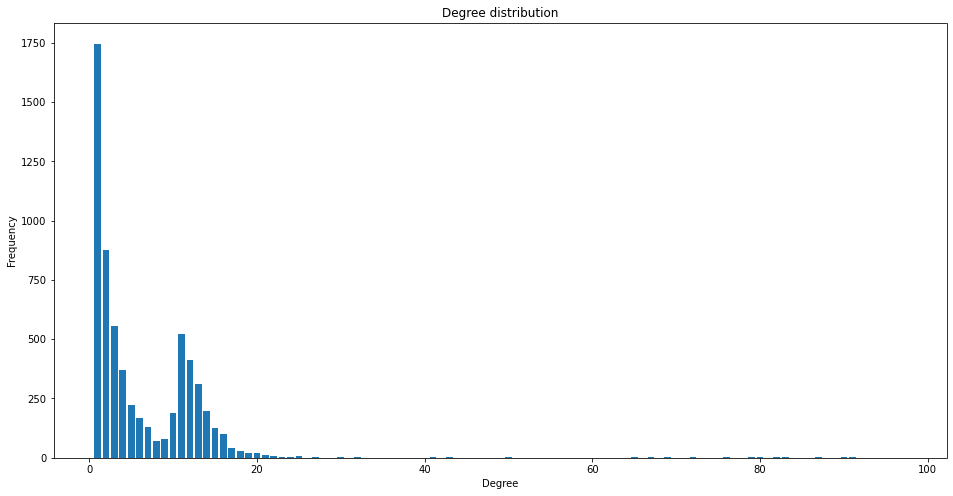

Top 10 nodes by degree:
(123, 97)
(127, 95)
(367, 94)
(424, 92)
(264, 91)
(251, 91)
(427, 91)
(266, 91)
(249, 90)
(145, 90)


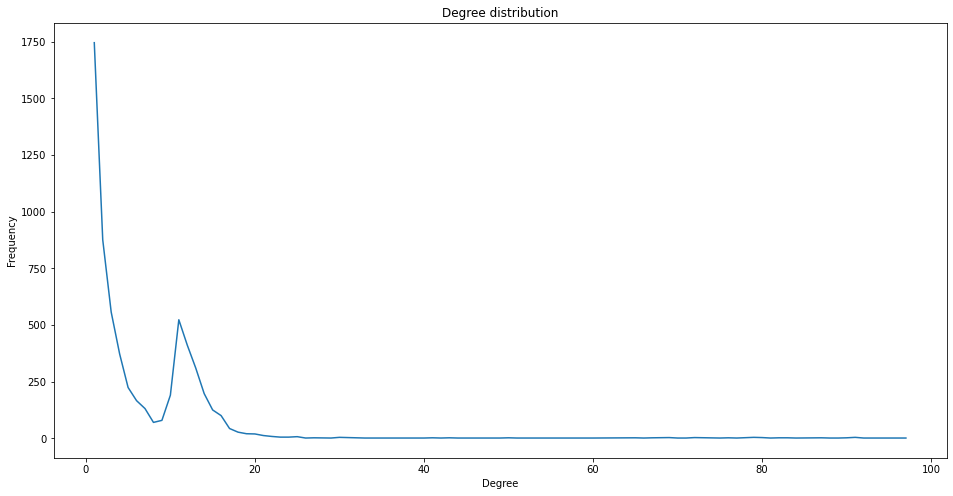

In [75]:
# Degree #
degree_dict = dict(G.degree())

degreeCount = collections.Counter(sorted(degree_dict.values(), reverse = True))
deg, cnt = zip(*degreeCount.items())

plot_histogram(G, "Degree distribution", 'Frequency', 'Degree', deg, cnt)
plot_distribution(G, "Degree distribution", 'Frequency', 'Degree', deg, cnt)
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by degree:")
for d in sorted_degree[:10]:
    print(d)

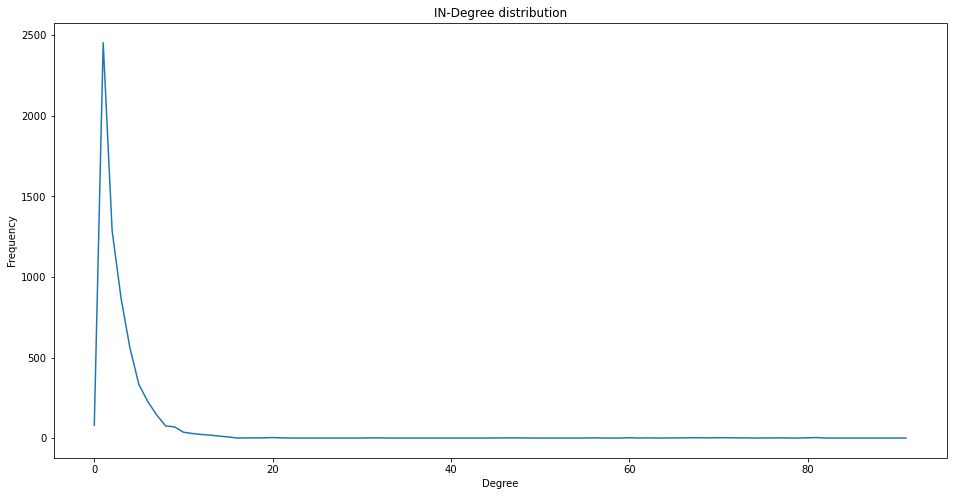

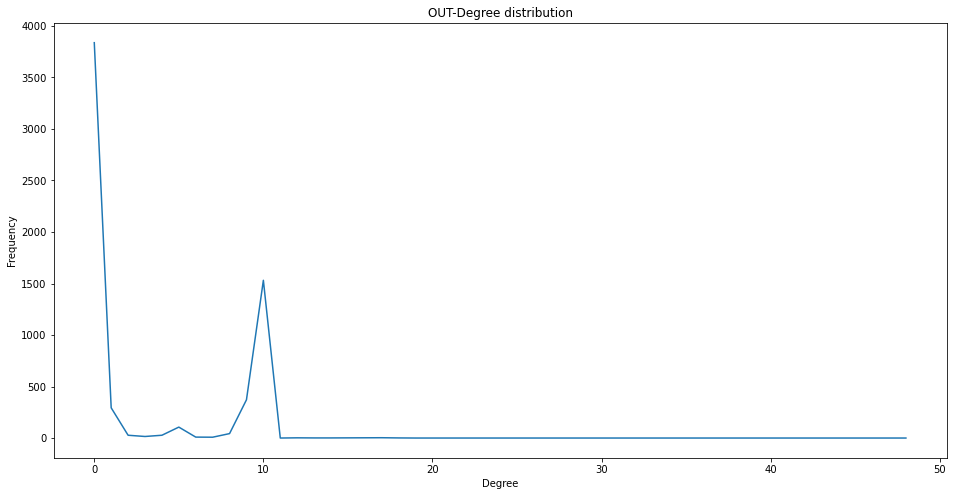

In [70]:
# in-degree #
in_degree_dict = dict(G.in_degree())

in_degreeCount = collections.Counter(sorted(in_degree_dict.values(), reverse = True))
in_deg, in_cnt = zip(*in_degreeCount.items())

plot_distribution(G, "IN-Degree distribution", 'Frequency', 'Degree', in_deg, in_cnt)

#out-degree #
out_degree_dict = dict(G.out_degree())

out_degreeCount = collections.Counter(sorted(out_degree_dict.values(), reverse = True))
out_deg, out_cnt = zip(*out_degreeCount.items())

plot_distribution(G, "OUT-Degree distribution", 'Frequency', 'Degree', out_deg, out_cnt)

In [71]:
def plot_histogram_float(G, title, ylabel, xlabel, x, y):
    fig, ax = plt.subplots()
    plt.gcf().set_size_inches(16, 8)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.bar(x, y, width=(max(x)-min(x))/50)
    plt.show()

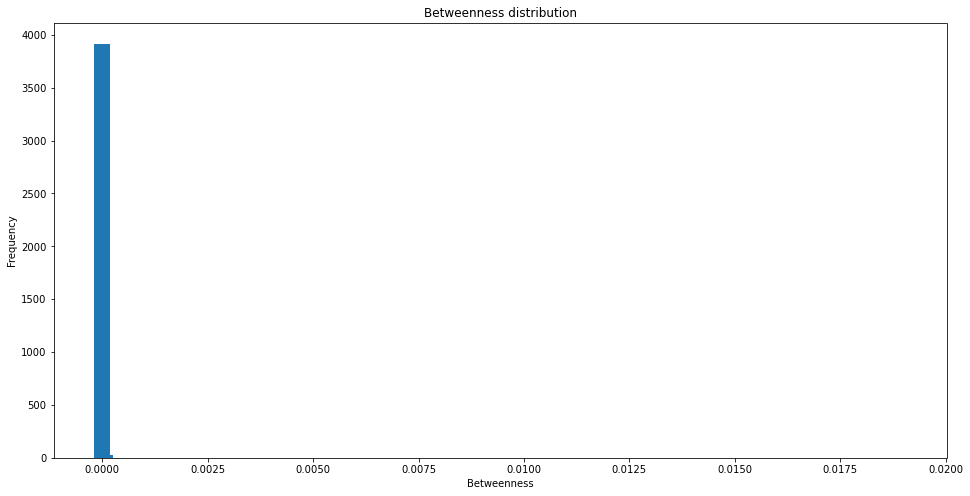

Top 10 nodes by betweenness centrality:
(1317, 0.0188687055523367)
(3, 0.017235200252786236)
(146, 0.0146110184536896)
(390, 0.014068027594482927)
(175, 0.01400021903697455)
(559, 0.01188855744490856)
(1534, 0.01171035445939237)
(250, 0.011174840806635084)
(700, 0.010316381587783799)
(264, 0.010157774674651789)


In [72]:
betweenness_dict = nx.betweenness_centrality(G)

betweennessCount = collections.Counter(sorted(betweenness_dict.values(), reverse = True))
bet, b_cnt = zip(*betweennessCount.items())

plot_histogram_float(G, "Betweenness distribution", 'Frequency', 'Betweenness', bet, b_cnt)
                    
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by betweenness centrality:")
for b in sorted_betweenness[:10]:
    print(b)


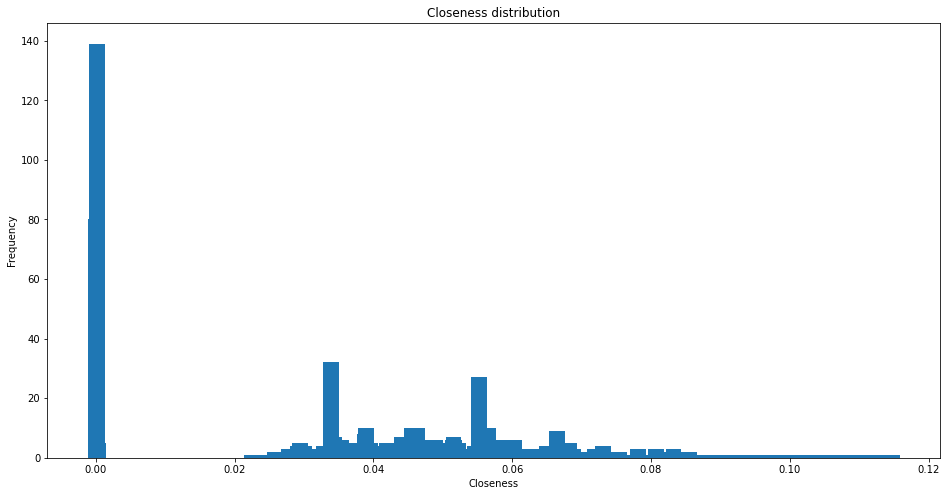

Top 10 nodes by closeness centrality:
(367, 0.11466016208378269)
(249, 0.11388122076527873)
(145, 0.11185486452390367)
(264, 0.11108072542323756)
(266, 0.1106774301629183)
(123, 0.11047879413433016)
(427, 0.11015613410473224)
(127, 0.11009182813035702)
(122, 0.1097873972273623)
(5, 0.10969161063679023)


In [73]:
closeness_dict = nx.closeness_centrality(G)

"""
for val in closeness_dict:
    closeness_dict[val] = round(closeness_dict[val], 5)
"""

closenessCount = collections.Counter(sorted(closeness_dict.values(), reverse = True))
cl, cl_cnt = zip(*closenessCount.items())

plot_histogram_float(G, "Closeness distribution", 'Frequency', 'Closeness', cl, cl_cnt)

sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by closeness centrality:")
for c in sorted_closeness[:10]:
    print(c)

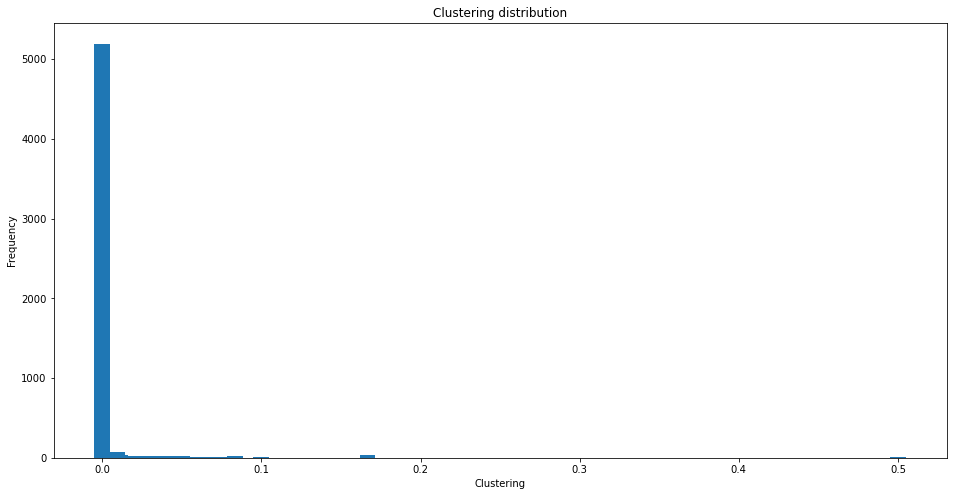

Top 10 nodes by clustering centrality:
(506, 0.5)
(702, 0.5)
(3589, 0.5)
(4223, 0.5)
(4278, 0.5)
(4321, 0.5)
(5060, 0.5)
(6287, 0.5)
(4022, 0.3333333333333333)
(2893, 0.16666666666666666)


In [74]:
clustering_dict = nx.clustering(G)

clusteringCount = collections.Counter(sorted(clustering_dict.values(), reverse = True))
clus, clus_cnt = zip(*clusteringCount.items())

plot_histogram_float(G, "Clustering distribution", 'Frequency', 'Clustering', clus, clus_cnt)

sorted_clustering = sorted(clustering_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by clustering centrality:")
for c in sorted_clustering[:10]:
    print(c)